In [1]:
# Download dataset
from torchvision.datasets import MNIST

In [2]:
np_train_dataset = MNIST('./mnist_train_np/', train=True, download=True)

In [3]:
# Start MLP implementation in numpy

In [31]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder

In [5]:
np.random.seed(3)

In [6]:
def fetch(fp):
    with open(fp, "rb") as f:
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8).copy()

In [7]:
X_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_train = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/train-labels-idx1-ubyte")[8:]
X_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-images-idx3-ubyte")[0x10:].reshape((-1, 28 * 28))
Y_test = fetch("/Users/hafeezali/CS_760/HW4/mnist_train_np/MNIST/raw/t10k-labels-idx1-ubyte")[8:]

In [9]:
def normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test):
    
    # Encode output label as a one hot vector
    oneHotEncoder = OneHotEncoder(sparse=False, categories='auto')
    Y_train = oneHotEncoder.fit_transform(Y_train.reshape(len(Y_train), -1))
    Y_test = oneHotEncoder.transform(Y_test.reshape(len(Y_test), -1))
    
    # Normalize data by diving by 255. All values are in range 0-255
    X_train = X_train / 255.
    X_test = X_test / 255.

    return X_train, Y_train, X_test, Y_test

In [10]:
X_train, Y_train, X_test, Y_test = normalize_data_and_convert_to_one_hot(X_train, Y_train, X_test, Y_test)

In [12]:
# initialize params
n = 60000

In [13]:
# initialize weights
def initialize_weights():
    W1 = np.random.randn(300, 784) / np.sqrt(784)
    W2 = np.random.randn(10, 300) / np.sqrt(300)
    return W1, W2

In [14]:
costs = []
accuracies = []

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
def softmax(x):
    power = np.exp(x - np.max(x))
    return power / power.sum(axis=0, keepdims=True)

In [17]:
def de_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [18]:
def forward(X, W1, W2):
    Z1 = W1.dot(X.T)
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1)
    A2 = softmax(Z2)
    return A1, W1, Z1, A2, W2, Z2

In [19]:
def backward(X, Y, A1, W1, Z1, A2, W2, Z2):
    dZ2 = A2 - Y.T
    dW2 = dZ2.dot(A1.T) / n
    dZ1 = W2.T.dot(dZ2) * de_sigmoid(Z1)
    dW1 = dZ1.dot(X) / n
    return dW1, dW2

In [20]:
def predict(W1, W2, X, Y):
    A1, W1, Z1, A2, W2, Z2 = forward(X, W1, W2)
    y_hat = np.argmax(A2, axis=0)
    Y = np.argmax(Y, axis = 1)
    accuracy = (y_hat == Y).mean()
    return accuracy * 100

In [21]:
def train_model(X, Y, alpha=0.1, epochs=1000):
    W1, W2 = initialize_weights()
    for epoch in range(epochs):
        A1, W1, Z1, A2, W2, Z2 = forward(X, W1, W2)
        cost = -np.mean(Y*np.log(A2.T))
        dW1, dW2 = backward(X, Y, A1, W1, Z1, A2, W2, Z2)
        W1 = W1 - alpha * dW1
        W2 = W2 - alpha * dW2
        acc = predict(W1, W2, X, Y)
        if epoch % 100 == 0:
            print("Cost: ", cost, "Train Accuracy:", acc)
        if epoch % 10 == 0:
            costs.append(cost)
            accuracies.append(acc)
    return W1, W2

In [22]:
W1, W2 = train_model(X_train, Y_train)
print("W1: ", W1)
print("W2: ", W2)

Cost:  0.256191797254474 Train Accuracy: 11.341666666666667
Cost:  0.14406876298661128 Train Accuracy: 76.73333333333333
Cost:  0.08921766689732809 Train Accuracy: 82.72
Cost:  0.06739963980011884 Train Accuracy: 85.08166666666666
Cost:  0.056732240723181455 Train Accuracy: 86.46666666666667
Cost:  0.050466148005605976 Train Accuracy: 87.375
Cost:  0.04635643853506467 Train Accuracy: 88.07000000000001
Cost:  0.04345948809526793 Train Accuracy: 88.51833333333333
Cost:  0.04130702645955707 Train Accuracy: 88.905
Cost:  0.03964092471893279 Train Accuracy: 89.21666666666667
W1:  [[ 0.06387959  0.01558964  0.00344634 ...  0.08277767  0.00929431
  -0.00038197]
 [-0.00828491 -0.00411447 -0.00972382 ... -0.0092874   0.02090517
   0.01205078]
 [ 0.04697977 -0.06075401  0.04262657 ... -0.01848008 -0.04617226
  -0.01070867]
 ...
 [-0.01228752  0.00400334  0.01453675 ... -0.01899857  0.06378976
  -0.03112804]
 [-0.02444201  0.02162284  0.0545243  ...  0.01429953 -0.00783727
   0.00728019]
 [ 0.065

In [23]:
predict(W1, W2, X_train, Y_train)

89.46833333333333

In [ ]:
# batch size == 60000 (full dataset)
# and learning rate = 0.1
# and epochs = 1000

In [24]:
predict(W1, W2, X_test, Y_test)

89.99000000000001

In [49]:
test_error = 100 - predict(W1, W2, X_test, Y_test)

In [50]:
test_error

10.009999999999991

In [44]:
def plot_cost():
    plt.figure()
    plt.plot(epochs, costs)
    plt.xlabel("epochs")
    plt.ylabel("cost")
    plt.show()

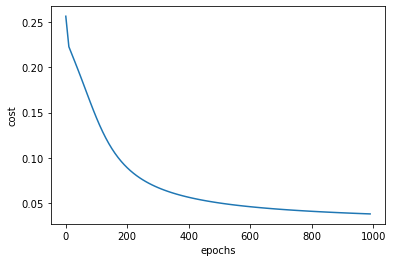

In [45]:
plot_cost()

In [47]:
def plot_accuracy():
    plt.figure()
    plt.plot(epochs, accuracies)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

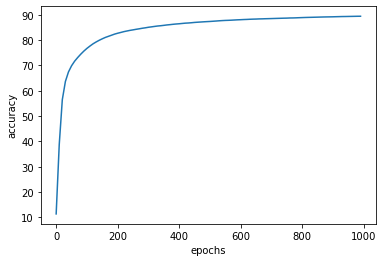

In [48]:
plot_accuracy()

In [39]:
epochs=[]
for i in range(0,1000,10):
    epochs.append(i)

In [40]:
len(epochs)

100

In [41]:
len(costs)

100